<h1>Data Analysis and Visualization Home Assignment</h1>
<li>I've tried to outline the steps for you so please make use of the cells
<li>If you run into data size issues, subset your data. But try to use as much as you can get away with
<li>Note that many of the steps will take a while to run, especially if your computer is not powerful enough. Be patient! 


<ol>
<li>Read the data from <b>yellow_tripdata_small_2016-01.csv</b>
<li>Remove any data that is outside the NYC bounding box
<ul>
<li>NYC bounding box: westlimit=-74.2635; southlimit=40.4856; eastlimit=-73.7526; northlimit=40.9596
<li>See http://boundingbox.klokantech.com for info on bounding boxes
</ul>
<li>Calculate taxi trip duration and save in a new column "duration"
<li>Convert duration into a float
<li>Do some basic analysis (see below)
<li>Add a day of week column
<li>Add an hour of day column
<li>Do some analysis (see below)
<li>Divide the data into zones
<ul>
<li>write a function createZoneTable(zone_factor) that divides the bounding box into zones
<li>the idea is to create zone_factor * zone_factor zones
<li>e.g., if zone_factor is 20, you'll create 20*20 = 400 zones
<li>Divide the longitude (-73.7526 to -74.2635) into zone_factor (e.g., 20) sections
<li>Divide the latitude (40.4856 to 40.9596) into zone_factor (e.g., 20) sections
<li>Return a table (a list of lists) containing a zone id, and the coordinates of the zone
<li>(see e.g., below)
</ul>
<li>Write a function get_zone(lon,lat) that figures out the zone given a latitude and longitude
<li>Apply this function to the dataframe, first with pickup lats and longs; then with dropoff lats and longs
<li>This will give two new "pickup_zone" and "dropoff_zone" columns
<li>Do some analysis (see below)
<li>Using folium, draw a heatmap of the number of trips originating in each zone
<ul>
<li>Create a geojson object for all the zones 
<li>Create a df that contains zone numbers and the number of trips originating in each zone
<li>Use folium to create a heatmap
<li><b>OPTIONAL:</b> You'll notice that the bounding box is much larger than New York City. Try to remove every zone that has 0 originating trips from your map. (Hint: You can remove them from the geojson object)


<h2>Read the data</h2>


In [1]:
#Add necessary imports and functions to read the data
import numpy as np
import pandas as pd

datafile = 'yellow_tripdata_small_2016-01.csv'
df = pd.read_csv(datafile)
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-01-25 10:44:43,2016-01-25 10:55:40,1,1.00,-73.980652,40.765316,1,N,-73.989792,40.752026,1,8.5,0.0,0.5,1.85,0.00,0.3,11.15
1,1,2016-01-13 10:19:36,2016-01-13 10:25:41,1,0.80,-73.948990,40.777428,1,N,-73.959045,40.771893,1,6.0,0.0,0.5,1.36,0.00,0.3,8.16
2,2,2016-01-12 00:42:42,2016-01-12 00:51:04,1,2.17,-74.008377,40.735664,1,N,-74.013580,40.707985,1,9.0,0.5,0.5,2.00,0.00,0.3,12.30
3,1,2016-01-10 16:21:17,2016-01-10 16:24:31,1,0.70,-73.961266,40.772495,1,N,-73.955887,40.779671,1,4.5,0.0,0.5,1.30,0.00,0.3,6.60
4,2,2016-01-05 11:29:53,2016-01-05 11:52:24,5,0.78,-73.976532,40.764683,1,N,-73.966904,40.769787,2,13.5,0.0,0.5,0.00,0.00,0.3,14.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090681,2,2016-01-21 07:58:34,2016-01-21 08:10:57,1,1.98,-74.009941,40.720230,1,N,-73.990326,40.731747,1,10.0,0.0,0.5,2.16,0.00,0.3,12.96
1090682,1,2016-01-07 01:15:38,2016-01-07 01:19:36,2,1.10,-73.971550,40.782257,1,N,-73.961464,40.795998,2,5.5,0.5,0.5,0.00,0.00,0.3,6.80
1090683,1,2016-01-09 10:42:32,2016-01-09 10:50:34,2,1.30,-74.000137,40.733067,1,N,-73.999969,40.720318,1,7.5,0.0,0.5,1.65,0.00,0.3,9.95
1090684,1,2016-01-10 15:34:00,2016-01-10 15:56:06,1,8.80,-73.874496,40.774082,1,N,-73.970444,40.795761,1,27.5,0.0,0.5,6.75,5.54,0.3,40.59


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1090686 entries, 0 to 1090685
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   VendorID               1090686 non-null  int64  
 1   tpep_pickup_datetime   1090686 non-null  object 
 2   tpep_dropoff_datetime  1090686 non-null  object 
 3   passenger_count        1090686 non-null  int64  
 4   trip_distance          1090686 non-null  float64
 5   pickup_longitude       1090686 non-null  float64
 6   pickup_latitude        1090686 non-null  float64
 7   RatecodeID             1090686 non-null  int64  
 8   store_and_fwd_flag     1090686 non-null  object 
 9   dropoff_longitude      1090686 non-null  float64
 10  dropoff_latitude       1090686 non-null  float64
 11  payment_type           1090686 non-null  int64  
 12  fare_amount            1090686 non-null  float64
 13  extra                  1090686 non-null  float64
 14  mta_tax           

<h2>Remove data outside the bounding box</h2>


In [3]:
westlimit=-74.2635; southlimit=40.4856; eastlimit=-73.7526; northlimit=40.9596
#Remove the data that is not within the limits specified above
df = df[(df['pickup_longitude']>westlimit) & (df['pickup_longitude']<eastlimit) &
        (df['pickup_latitude']>southlimit) & (df['pickup_latitude']<northlimit) &
        (df['dropoff_longitude']>westlimit) & (df['dropoff_longitude']<eastlimit) & 
        (df['dropoff_latitude']>southlimit) & (df['dropoff_latitude']<northlimit)]
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-01-25 10:44:43,2016-01-25 10:55:40,1,1.00,-73.980652,40.765316,1,N,-73.989792,40.752026,1,8.5,0.0,0.5,1.85,0.00,0.3,11.15
1,1,2016-01-13 10:19:36,2016-01-13 10:25:41,1,0.80,-73.948990,40.777428,1,N,-73.959045,40.771893,1,6.0,0.0,0.5,1.36,0.00,0.3,8.16
2,2,2016-01-12 00:42:42,2016-01-12 00:51:04,1,2.17,-74.008377,40.735664,1,N,-74.013580,40.707985,1,9.0,0.5,0.5,2.00,0.00,0.3,12.30
3,1,2016-01-10 16:21:17,2016-01-10 16:24:31,1,0.70,-73.961266,40.772495,1,N,-73.955887,40.779671,1,4.5,0.0,0.5,1.30,0.00,0.3,6.60
4,2,2016-01-05 11:29:53,2016-01-05 11:52:24,5,0.78,-73.976532,40.764683,1,N,-73.966904,40.769787,2,13.5,0.0,0.5,0.00,0.00,0.3,14.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090681,2,2016-01-21 07:58:34,2016-01-21 08:10:57,1,1.98,-74.009941,40.720230,1,N,-73.990326,40.731747,1,10.0,0.0,0.5,2.16,0.00,0.3,12.96
1090682,1,2016-01-07 01:15:38,2016-01-07 01:19:36,2,1.10,-73.971550,40.782257,1,N,-73.961464,40.795998,2,5.5,0.5,0.5,0.00,0.00,0.3,6.80
1090683,1,2016-01-09 10:42:32,2016-01-09 10:50:34,2,1.30,-74.000137,40.733067,1,N,-73.999969,40.720318,1,7.5,0.0,0.5,1.65,0.00,0.3,9.95
1090684,1,2016-01-10 15:34:00,2016-01-10 15:56:06,1,8.80,-73.874496,40.774082,1,N,-73.970444,40.795761,1,27.5,0.0,0.5,6.75,5.54,0.3,40.59


<h2>Add a column for taxi trip duration</h2>
<li>strptime formats: http://pubs.opengroup.org/onlinepubs/009695399/functions/strptime.html

In [4]:
import datetime

df['tpep_pickup_datetime'] = df['tpep_pickup_datetime'].apply(lambda x:datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
df['tpep_dropoff_datetime'] = df['tpep_dropoff_datetime'].apply(lambda x:datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [5]:
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,1,2016-01-25 10:44:43,2016-01-25 10:55:40,1,1.00,-73.980652,40.765316,1,N,-73.989792,40.752026,1,8.5,0.0,0.5,1.85,0.00,0.3,11.15,0 days 00:10:57
1,1,2016-01-13 10:19:36,2016-01-13 10:25:41,1,0.80,-73.948990,40.777428,1,N,-73.959045,40.771893,1,6.0,0.0,0.5,1.36,0.00,0.3,8.16,0 days 00:06:05
2,2,2016-01-12 00:42:42,2016-01-12 00:51:04,1,2.17,-74.008377,40.735664,1,N,-74.013580,40.707985,1,9.0,0.5,0.5,2.00,0.00,0.3,12.30,0 days 00:08:22
3,1,2016-01-10 16:21:17,2016-01-10 16:24:31,1,0.70,-73.961266,40.772495,1,N,-73.955887,40.779671,1,4.5,0.0,0.5,1.30,0.00,0.3,6.60,0 days 00:03:14
4,2,2016-01-05 11:29:53,2016-01-05 11:52:24,5,0.78,-73.976532,40.764683,1,N,-73.966904,40.769787,2,13.5,0.0,0.5,0.00,0.00,0.3,14.30,0 days 00:22:31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090681,2,2016-01-21 07:58:34,2016-01-21 08:10:57,1,1.98,-74.009941,40.720230,1,N,-73.990326,40.731747,1,10.0,0.0,0.5,2.16,0.00,0.3,12.96,0 days 00:12:23
1090682,1,2016-01-07 01:15:38,2016-01-07 01:19:36,2,1.10,-73.971550,40.782257,1,N,-73.961464,40.795998,2,5.5,0.5,0.5,0.00,0.00,0.3,6.80,0 days 00:03:58
1090683,1,2016-01-09 10:42:32,2016-01-09 10:50:34,2,1.30,-74.000137,40.733067,1,N,-73.999969,40.720318,1,7.5,0.0,0.5,1.65,0.00,0.3,9.95,0 days 00:08:02
1090684,1,2016-01-10 15:34:00,2016-01-10 15:56:06,1,8.80,-73.874496,40.774082,1,N,-73.970444,40.795761,1,27.5,0.0,0.5,6.75,5.54,0.3,40.59,0 days 00:22:06


<h2>Convert duration column into a float (number of seconds)</h2>
<li><span style="color:blue">timedelta64(1, 's')</span> represents one second

In [6]:
import numpy as np
#df['duration'] = df['duration'] / np.timedelta64(1, 's')
df['duration'] = df['duration'].apply(lambda x:x/np.timedelta64(1, 's'))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,1,2016-01-25 10:44:43,2016-01-25 10:55:40,1,1.00,-73.980652,40.765316,1,N,-73.989792,40.752026,1,8.5,0.0,0.5,1.85,0.00,0.3,11.15,657.0
1,1,2016-01-13 10:19:36,2016-01-13 10:25:41,1,0.80,-73.948990,40.777428,1,N,-73.959045,40.771893,1,6.0,0.0,0.5,1.36,0.00,0.3,8.16,365.0
2,2,2016-01-12 00:42:42,2016-01-12 00:51:04,1,2.17,-74.008377,40.735664,1,N,-74.013580,40.707985,1,9.0,0.5,0.5,2.00,0.00,0.3,12.30,502.0
3,1,2016-01-10 16:21:17,2016-01-10 16:24:31,1,0.70,-73.961266,40.772495,1,N,-73.955887,40.779671,1,4.5,0.0,0.5,1.30,0.00,0.3,6.60,194.0
4,2,2016-01-05 11:29:53,2016-01-05 11:52:24,5,0.78,-73.976532,40.764683,1,N,-73.966904,40.769787,2,13.5,0.0,0.5,0.00,0.00,0.3,14.30,1351.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090681,2,2016-01-21 07:58:34,2016-01-21 08:10:57,1,1.98,-74.009941,40.720230,1,N,-73.990326,40.731747,1,10.0,0.0,0.5,2.16,0.00,0.3,12.96,743.0
1090682,1,2016-01-07 01:15:38,2016-01-07 01:19:36,2,1.10,-73.971550,40.782257,1,N,-73.961464,40.795998,2,5.5,0.5,0.5,0.00,0.00,0.3,6.80,238.0
1090683,1,2016-01-09 10:42:32,2016-01-09 10:50:34,2,1.30,-74.000137,40.733067,1,N,-73.999969,40.720318,1,7.5,0.0,0.5,1.65,0.00,0.3,9.95,482.0
1090684,1,2016-01-10 15:34:00,2016-01-10 15:56:06,1,8.80,-73.874496,40.774082,1,N,-73.970444,40.795761,1,27.5,0.0,0.5,6.75,5.54,0.3,40.59,1326.0


<h2>Remove data where duration is greater than 10000 seconds</h2>

In [8]:
df = df[df['duration']<=10000]
df.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
count,1.068795e+06,1.068795e+06,1.068795e+06,1.068795e+06,1.068795e+06,1.068795e+06,1.068795e+06,1.068795e+06,1.068795e+06,1.068795e+06,1.068795e+06,1.068795e+06,1.068795e+06,1.068795e+06,1.068795e+06,1.068795e+06,1.068795e+06
mean,1.537474e+00,1.675634e+00,3.470652e+00,-7.397338e+01,4.075106e+01,1.032649e+00,-7.397385e+01,4.075198e+01,1.347040e+00,1.236459e+01,3.132613e-01,4.980221e-01,1.740493e+00,2.896489e-01,2.997729e-01,1.550577e+01,7.881927e+02
std,4.985939e-01,1.330096e+00,6.123049e+02,3.793092e-02,2.786394e-02,3.502037e-01,3.328340e-02,3.155624e-02,4.904305e-01,1.145249e+01,3.658510e-01,3.397650e-02,2.530275e+00,1.602460e+00,1.141863e-02,1.372073e+01,6.113963e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,-7.426302e+01,4.052975e+01,1.000000e+00,-7.426303e+01,4.050237e+01,1.000000e+00,-2.800000e+02,-1.000000e+00,-5.000000e-01,-7.000000e+01,-1.050000e+01,-3.000000e-01,-2.803000e+02,0.000000e+00
25%,1.000000e+00,1.000000e+00,1.000000e+00,-7.399165e+01,4.073759e+01,1.000000e+00,-7.399122e+01,4.073635e+01,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.300000e+00,3.810000e+02
50%,2.000000e+00,1.000000e+00,1.670000e+00,-7.398169e+01,4.075443e+01,1.000000e+00,-7.397981e+01,4.075475e+01,1.000000e+00,9.000000e+00,0.000000e+00,5.000000e-01,1.260000e+00,0.000000e+00,3.000000e-01,1.160000e+01,6.270000e+02
75%,2.000000e+00,2.000000e+00,3.060000e+00,-7.396719e+01,4.076844e+01,1.000000e+00,-7.396316e+01,4.076993e+01,2.000000e+00,1.400000e+01,5.000000e-01,5.000000e-01,2.320000e+00,0.000000e+00,3.000000e-01,1.716000e+01,1.009000e+03
max,2.000000e+00,9.000000e+00,6.330083e+05,-7.375336e+01,4.095737e+01,9.900000e+01,-7.375261e+01,4.095958e+01,4.000000e+00,5.000000e+03,4.500000e+00,5.000000e-01,5.500000e+02,8.855900e+02,3.000000e-01,5.000800e+03,9.942000e+03


<h2>Plot duration and compare with a gamma distribution</h2>

In [9]:
#!pip install seaborn
#!conda install --yes seaborn
#import sys
#!conda install --yes --prefix {sys.prefix} seaborn
#!conda create --yes --prefix /Users/josephhigh/ml/my_env python=3.8

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [11]:
from scipy import stats

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

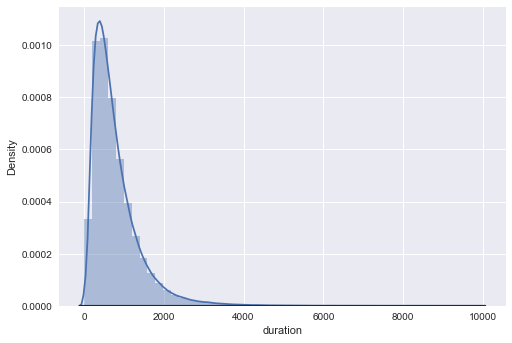

In [12]:
sns.distplot(df['duration'],kde=True,fit=stats.gamma)

<h2>Plot the scatter plot between trip_distance and duration</h2>

<AxesSubplot:xlabel='trip_distance', ylabel='duration'>

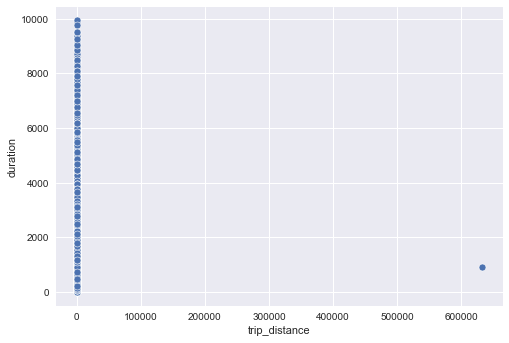

In [13]:
## Scatter plot using seaborn package
sns.scatterplot(data=df, x='trip_distance',y='duration')

Text(0.5, 1.0, 'Trip Distance vs. Trip Duration')

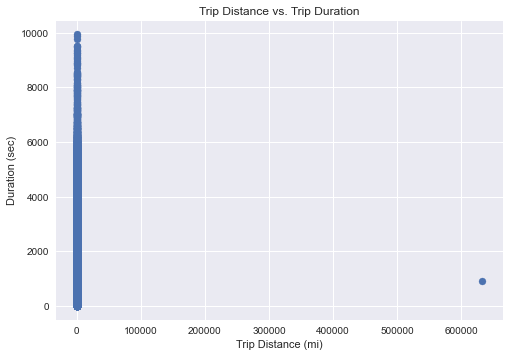

In [14]:
# Alternative scatter plot using matplotlib.pyplot
plt.scatter(x=df['trip_distance'],y=df['duration'])
plt.xlabel('Trip Distance (mi)')
plt.ylabel('Duration (sec)')
plt.title('Trip Distance vs. Trip Duration')

<h2>Create a column "day_of_week" that puts in an integer for the weekday</h2>
<li>Monday = 1, Sunday = 7
<li>Investigate here! https://docs.python.org/3/library/datetime.html
<li>Use tpep_pickup_datetime to get the weekday

In [15]:
df['day_of_week'] = df['tpep_pickup_datetime'].apply(lambda x:datetime.date.isoweekday(x))
df

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,day_of_week
0,1,2016-01-25 10:44:43,2016-01-25 10:55:40,1,1.00,-73.980652,40.765316,1,N,-73.989792,...,1,8.5,0.0,0.5,1.85,0.00,0.3,11.15,657.0,1
1,1,2016-01-13 10:19:36,2016-01-13 10:25:41,1,0.80,-73.948990,40.777428,1,N,-73.959045,...,1,6.0,0.0,0.5,1.36,0.00,0.3,8.16,365.0,3
2,2,2016-01-12 00:42:42,2016-01-12 00:51:04,1,2.17,-74.008377,40.735664,1,N,-74.013580,...,1,9.0,0.5,0.5,2.00,0.00,0.3,12.30,502.0,2
3,1,2016-01-10 16:21:17,2016-01-10 16:24:31,1,0.70,-73.961266,40.772495,1,N,-73.955887,...,1,4.5,0.0,0.5,1.30,0.00,0.3,6.60,194.0,7
4,2,2016-01-05 11:29:53,2016-01-05 11:52:24,5,0.78,-73.976532,40.764683,1,N,-73.966904,...,2,13.5,0.0,0.5,0.00,0.00,0.3,14.30,1351.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090681,2,2016-01-21 07:58:34,2016-01-21 08:10:57,1,1.98,-74.009941,40.720230,1,N,-73.990326,...,1,10.0,0.0,0.5,2.16,0.00,0.3,12.96,743.0,4
1090682,1,2016-01-07 01:15:38,2016-01-07 01:19:36,2,1.10,-73.971550,40.782257,1,N,-73.961464,...,2,5.5,0.5,0.5,0.00,0.00,0.3,6.80,238.0,4
1090683,1,2016-01-09 10:42:32,2016-01-09 10:50:34,2,1.30,-74.000137,40.733067,1,N,-73.999969,...,1,7.5,0.0,0.5,1.65,0.00,0.3,9.95,482.0,6
1090684,1,2016-01-10 15:34:00,2016-01-10 15:56:06,1,8.80,-73.874496,40.774082,1,N,-73.970444,...,1,27.5,0.0,0.5,6.75,5.54,0.3,40.59,1326.0,7


<h2>Create time of day buckets using the hour part of tpep_pickup_datetime</h2>

In [16]:
df['pickup_hour'] = df['tpep_pickup_datetime'].apply(lambda x:x.hour)
df

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,day_of_week,pickup_hour
0,1,2016-01-25 10:44:43,2016-01-25 10:55:40,1,1.00,-73.980652,40.765316,1,N,-73.989792,...,8.5,0.0,0.5,1.85,0.00,0.3,11.15,657.0,1,10
1,1,2016-01-13 10:19:36,2016-01-13 10:25:41,1,0.80,-73.948990,40.777428,1,N,-73.959045,...,6.0,0.0,0.5,1.36,0.00,0.3,8.16,365.0,3,10
2,2,2016-01-12 00:42:42,2016-01-12 00:51:04,1,2.17,-74.008377,40.735664,1,N,-74.013580,...,9.0,0.5,0.5,2.00,0.00,0.3,12.30,502.0,2,0
3,1,2016-01-10 16:21:17,2016-01-10 16:24:31,1,0.70,-73.961266,40.772495,1,N,-73.955887,...,4.5,0.0,0.5,1.30,0.00,0.3,6.60,194.0,7,16
4,2,2016-01-05 11:29:53,2016-01-05 11:52:24,5,0.78,-73.976532,40.764683,1,N,-73.966904,...,13.5,0.0,0.5,0.00,0.00,0.3,14.30,1351.0,2,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090681,2,2016-01-21 07:58:34,2016-01-21 08:10:57,1,1.98,-74.009941,40.720230,1,N,-73.990326,...,10.0,0.0,0.5,2.16,0.00,0.3,12.96,743.0,4,7
1090682,1,2016-01-07 01:15:38,2016-01-07 01:19:36,2,1.10,-73.971550,40.782257,1,N,-73.961464,...,5.5,0.5,0.5,0.00,0.00,0.3,6.80,238.0,4,1
1090683,1,2016-01-09 10:42:32,2016-01-09 10:50:34,2,1.30,-74.000137,40.733067,1,N,-73.999969,...,7.5,0.0,0.5,1.65,0.00,0.3,9.95,482.0,6,10
1090684,1,2016-01-10 15:34:00,2016-01-10 15:56:06,1,8.80,-73.874496,40.774082,1,N,-73.970444,...,27.5,0.0,0.5,6.75,5.54,0.3,40.59,1326.0,7,15


<h2>Plot a bar graph that groups the data by day of week and then by time of day</h2>
<li>Do you notice any differences?</li>

<AxesSubplot:xlabel='day_of_week'>

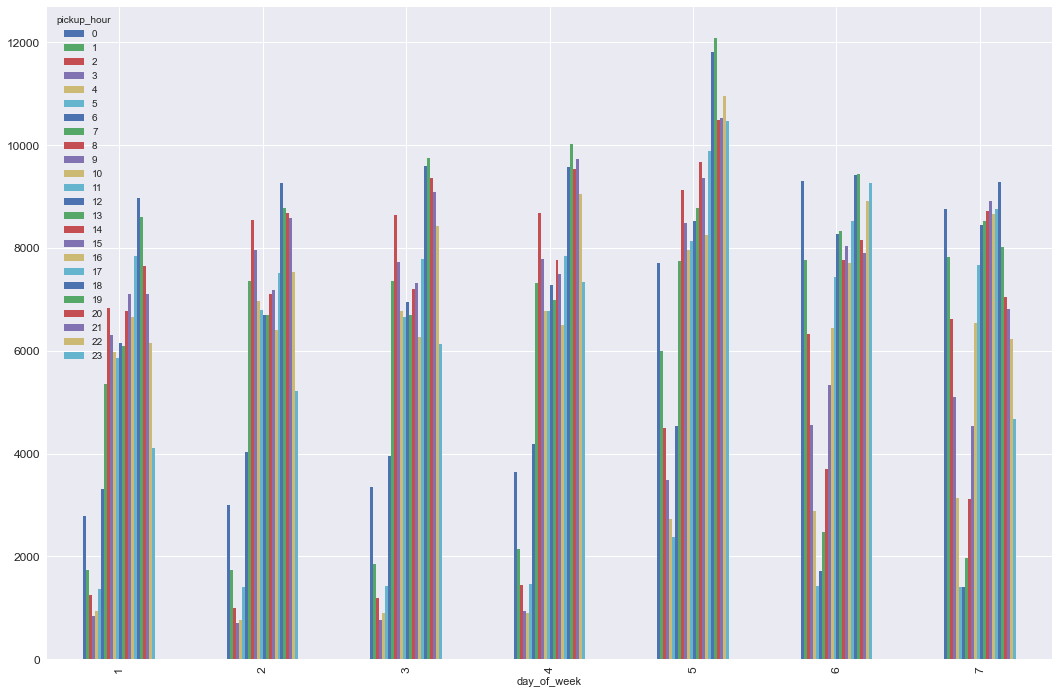

In [17]:
# Grouping by BOTH day of week and pick-up hour:

week_and_time = df.groupby(['day_of_week','pickup_hour'])
week_and_time.size().unstack().plot(kind='bar',figsize=(18,12),fontsize='large')
#plt.figlegend(fontsize='small')

#### Evaluation of plot and differences: 
The plot suggests that taxis rides pick-up later in the day, between 6:00PM and 7:00PM and even more so on the 5th day of the week (i.e., Friday). Taxi rides appear to be most frequent in the late afternoon on the 5th day of the week (Friday) than any other time and day of the week. On the other hand, the trend of trip frequency on every other day of the week appears to be similar, whereby there are very few trips in the very early morning (2:00AM - 5:00AM) and pick up substantially before dropping off a little in the early afternoon (12PM - 4:00PM), and significantly increasing in the late afternoon between 6:00PM and 9:00PM. 

<AxesSubplot:xlabel='day_of_week'>

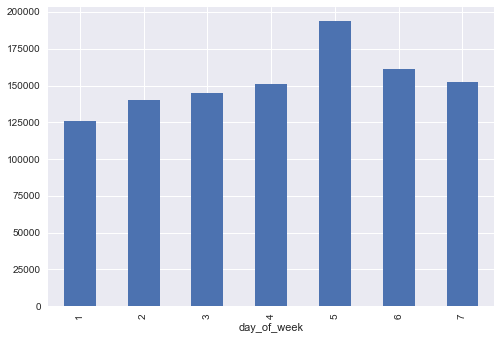

In [18]:
# Grouping by day_of_week and pickup_hour individually now

trip_by_weekday = df.groupby('day_of_week')
trip_by_weekday.size().plot(kind='bar')

<AxesSubplot:xlabel='pickup_hour'>

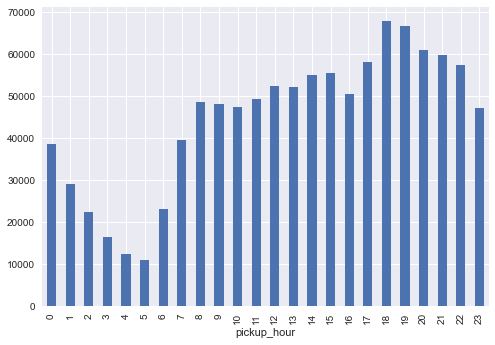

In [19]:
trip_by_time = df.groupby('pickup_hour')
trip_by_time.size().plot(kind='bar')

#### Additional notes on plots above:
Similar to the results above, the plots suggest that most trips occur on the 5th day of the week (i.e., Friday) and during the 18th hour of the day (i.e., 6:00 PM). 

<h2>Create zones</h2>

In [20]:
def createZoneTable(zone_factor,westlimit=-74.2635, southlimit=40.4856, eastlimit=-73.7526, northlimit=40.9596):
    zone_table = list()
    
#     lat_dist = northlimit-southlimit
#     long_dist = eastlimit-westlimit
#     zone_lat = np.arange(southlimit,northlimit,lat_dist/zone_factor)
#     zone_long = np.arange(westlimit,eastlimit,long_dist/zone_factor)
    
    # partitioning into zones using numpy.linspace function
    step_size = zone_factor+1
    zone_lat = np.linspace(southlimit,northlimit,num=step_size)
    zone_long = np.linspace(westlimit,eastlimit,num=step_size)
    zone_cnt = 0
    
    for i in range(zone_factor):
        for j in range(zone_factor):
            #zone_number=str(i)+str(j)
            
            # constructing zone ID numbers such that they're between 1 and 400:
            zone_cnt += 1  
            zone_number=str(zone_cnt)
            if zone_cnt < 10:
                zone_number = '0'+zone_number
            
            # constructing the i-th zone's boundary coordinates:
            zone_coordinates = [[zone_lat[i],zone_long[j]],[zone_lat[i],zone_long[j+1]],
                                                [zone_lat[i+1],zone_long[j+1]],
                                                [zone_lat[i+1],zone_long[j]],
                                                [zone_lat[i],zone_long[j]]]
            zone_table.append((zone_number, zone_coordinates))

    return zone_table

In [21]:
createZoneTable(20)

[('01',
  [[40.4856, -74.2635],
   [40.4856, -74.237955],
   [40.509299999999996, -74.237955],
   [40.509299999999996, -74.2635],
   [40.4856, -74.2635]]),
 ('02',
  [[40.4856, -74.237955],
   [40.4856, -74.21240999999999],
   [40.509299999999996, -74.21240999999999],
   [40.509299999999996, -74.237955],
   [40.4856, -74.237955]]),
 ('03',
  [[40.4856, -74.21240999999999],
   [40.4856, -74.186865],
   [40.509299999999996, -74.186865],
   [40.509299999999996, -74.21240999999999],
   [40.4856, -74.21240999999999]]),
 ('04',
  [[40.4856, -74.186865],
   [40.4856, -74.16131999999999],
   [40.509299999999996, -74.16131999999999],
   [40.509299999999996, -74.186865],
   [40.4856, -74.186865]]),
 ('05',
  [[40.4856, -74.16131999999999],
   [40.4856, -74.135775],
   [40.509299999999996, -74.135775],
   [40.509299999999996, -74.16131999999999],
   [40.4856, -74.16131999999999]]),
 ('06',
  [[40.4856, -74.135775],
   [40.4856, -74.11023],
   [40.509299999999996, -74.11023],
   [40.50929999999999

Example of a zone table

[('00',
  [[40.4856, -74.2635],
   [40.4856, -74.21240999999999],
   [40.533, -74.21240999999999],
   [40.533, -74.2635],
   [40.4856, -74.2635]]),
 ('01',
  [[40.4856, -74.21240999999999],
   [40.4856, -74.16131999999999],
   [40.533, -74.16131999999999],
   [40.533, -74.21240999999999],
   [40.4856, -74.21240999999999]]),
 ('02',
  [[40.4856, -74.16131999999999],
   [40.4856, -74.11022999999999],
   [40.533, -74.11022999999999],
   [40.533, -74.16131999999999],
   [40.4856, -74.16131999999999]]),
 ('03',
  [[40.4856, -74.11022999999999],
   [40.4856, -74.05913999999999],
   [40.533, -74.05913999999999],
   [40.533, -74.11022999999999],
   [40.4856, -74.11022999999999]]),

In [22]:
def createGeoJsonObject(zone_table):
    zone_data_dict = dict()
    zone_data_dict['type'] = 'FeatureCollection'
    zone_data_dict_features = list()
    zone_data_dict['features'] = zone_data_dict_features
    
    # Method inspired by example in class
    n = len(zone_table)
    for i in range(n):
        zone_data = zone_table[i]
        zone_number = zone_data[0]
        zone_coordinates = zone_data[1]
        
        data_point = {"geometry":{'coordinates':zone_coordinates,"type":"Polygon"},
                      "properties":{"zone_id":zone_number},
                      "type":"Feature"}
        
        zone_data_dict_features.append(data_point)
    zone_data_dict['features'] = zone_data_dict_features
    return zone_data_dict

In [23]:
zone_table = createZoneTable(20)
createGeoJsonObject(zone_table)

{'type': 'FeatureCollection',
 'features': [{'geometry': {'coordinates': [[40.4856, -74.2635],
     [40.4856, -74.237955],
     [40.509299999999996, -74.237955],
     [40.509299999999996, -74.2635],
     [40.4856, -74.2635]],
    'type': 'Polygon'},
   'properties': {'zone_id': '01'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[40.4856, -74.237955],
     [40.4856, -74.21240999999999],
     [40.509299999999996, -74.21240999999999],
     [40.509299999999996, -74.237955],
     [40.4856, -74.237955]],
    'type': 'Polygon'},
   'properties': {'zone_id': '02'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[40.4856, -74.21240999999999],
     [40.4856, -74.186865],
     [40.509299999999996, -74.186865],
     [40.509299999999996, -74.21240999999999],
     [40.4856, -74.21240999999999]],
    'type': 'Polygon'},
   'properties': {'zone_id': '03'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[40.4856, -74.186865],
     [40.4856, -74.16131999999999],
     [40.50929

Example of the 'features' list in the geojson object

{'features': [{'geometry': {'coordinates': [[[-74.2635, 40.4856],
      [-74.21240999999999, 40.4856],
      [-74.21240999999999, 40.533],
      [-74.2635, 40.533],
      [-74.2635, 40.4856]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '00'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[-74.21240999999999, 40.4856],
      [-74.16131999999999, 40.4856],
      [-74.16131999999999, 40.533],
      [-74.21240999999999, 40.533],
      [-74.21240999999999, 40.4856]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '01'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[-74.16131999999999, 40.4856],
      [-74.11022999999999, 40.4856],
      [-74.11022999999999, 40.533],
      [-74.16131999999999, 40.533],
      [-74.16131999999999, 40.4856]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '02'},
   'type': 'Feature'},

<h3>Create the zone table for zone_factor = 20</h3>

In [24]:
zone_factor = 20
zone_table = createZoneTable(zone_factor,westlimit=-74.2635, southlimit=40.4856, eastlimit=-73.7526, northlimit=40.9596)
zone_table

[('01',
  [[40.4856, -74.2635],
   [40.4856, -74.237955],
   [40.509299999999996, -74.237955],
   [40.509299999999996, -74.2635],
   [40.4856, -74.2635]]),
 ('02',
  [[40.4856, -74.237955],
   [40.4856, -74.21240999999999],
   [40.509299999999996, -74.21240999999999],
   [40.509299999999996, -74.237955],
   [40.4856, -74.237955]]),
 ('03',
  [[40.4856, -74.21240999999999],
   [40.4856, -74.186865],
   [40.509299999999996, -74.186865],
   [40.509299999999996, -74.21240999999999],
   [40.4856, -74.21240999999999]]),
 ('04',
  [[40.4856, -74.186865],
   [40.4856, -74.16131999999999],
   [40.509299999999996, -74.16131999999999],
   [40.509299999999996, -74.186865],
   [40.4856, -74.186865]]),
 ('05',
  [[40.4856, -74.16131999999999],
   [40.4856, -74.135775],
   [40.509299999999996, -74.135775],
   [40.509299999999996, -74.16131999999999],
   [40.4856, -74.16131999999999]]),
 ('06',
  [[40.4856, -74.135775],
   [40.4856, -74.11023],
   [40.509299999999996, -74.11023],
   [40.50929999999999

In [25]:
createGeoJsonObject(zone_table)

{'type': 'FeatureCollection',
 'features': [{'geometry': {'coordinates': [[40.4856, -74.2635],
     [40.4856, -74.237955],
     [40.509299999999996, -74.237955],
     [40.509299999999996, -74.2635],
     [40.4856, -74.2635]],
    'type': 'Polygon'},
   'properties': {'zone_id': '01'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[40.4856, -74.237955],
     [40.4856, -74.21240999999999],
     [40.509299999999996, -74.21240999999999],
     [40.509299999999996, -74.237955],
     [40.4856, -74.237955]],
    'type': 'Polygon'},
   'properties': {'zone_id': '02'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[40.4856, -74.21240999999999],
     [40.4856, -74.186865],
     [40.509299999999996, -74.186865],
     [40.509299999999996, -74.21240999999999],
     [40.4856, -74.21240999999999]],
    'type': 'Polygon'},
   'properties': {'zone_id': '03'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[40.4856, -74.186865],
     [40.4856, -74.16131999999999],
     [40.50929

<h2>Write a function that returns a zone number given a latitude and a longitude</h2>

<li>The function should return a string zone number
<li>For the example, <span style="color:blue">get_zone(-74.19,40.65)</span> the function should return "62" (for a zone factor of 20, assuming you have numbered the zones from 1 to 400)

In [26]:
def get_zone(lon,lat,zone_table):
    zone = ''
    for x in zone_table:
        if (lon>=x[1][0][1]) and (lon<=x[1][1][1]):
            if (lat>=x[1][0][0]) and (lat<=x[1][2][0]):
                zone = x[0]
    
    return zone

## Note: The longitude and latitude arguments are backwards as specified in the instructions. 
## By backwards, I mean opposite compared to the normal (latitude, longitude) convention.

In [27]:
get_zone(-74.19,40.65,zone_table)

'123'

In [28]:
# This will only return 62 if the zones are numbered with str(row #) + str(column #).
# Zone 123 is the correct result when the zones are numbered from 1 to 400.

In [29]:
# Another test example
get_zone(-74.1,40.78,zone_table)

'247'

<h2>Create  pickup_zone and dropoff_zone columns for the dataframe</h2>
<li>This is a little tricky
<li>Pandas 'apply' function applies a function to each row in turn


<h4>apply</h4>

df.apply(foo)<br>
translates to<br>
foo(row1)<br>
foo(row2)<br>
foo(row3)<br>
i.e., the table row is the implicit argument of foo.
<p>
If we want to write our own foo, the argument to foo will be a dataframe row.<p>
From this row, we can extract the values we want and pass it to the explicit arguments of foo
<p>


In [30]:
import pandas as pd
df_sample = pd.DataFrame([[1,5,7],[2,4,6],[3,9,2]],columns=['A','B','C'])

print(df_sample)
def foo(x,y):
    return x+y

df_sample['new_col'] = df_sample.apply(lambda x: foo(x['A'],x['B']),axis=1)
#axis = 1 means extract data from rows of the dataframe. by default, it extracts from columns. (Set axis to 0 and see what happens)

df_sample

   A  B  C
0  1  5  7
1  2  4  6
2  3  9  2


,A,B,C,new_col
0,1,5,7,6
1,2,4,6,6
2,3,9,2,12


In [31]:
## Note again that the longitude and latitude arguments are backwards, as specified in
## in the instructions for the get_zone() function.

df['pickup_zone'] = df.apply(lambda x: get_zone(x['pickup_longitude'],x['pickup_latitude'],zone_table),axis=1)
df['dropoff_zone'] = df.apply(lambda x: get_zone(x['dropoff_longitude'],x['dropoff_latitude'],zone_table),axis=1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [32]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,day_of_week,pickup_hour,pickup_zone,dropoff_zone
0,1,2016-01-25 10:44:43,2016-01-25 10:55:40,1,1.00,-73.980652,40.765316,1,N,-73.989792,...,0.5,1.85,0.00,0.3,11.15,657.0,1,10,232,231
1,1,2016-01-13 10:19:36,2016-01-13 10:25:41,1,0.80,-73.948990,40.777428,1,N,-73.959045,...,0.5,1.36,0.00,0.3,8.16,365.0,3,10,253,252
2,2,2016-01-12 00:42:42,2016-01-12 00:51:04,1,2.17,-74.008377,40.735664,1,N,-74.013580,...,0.5,2.00,0.00,0.3,12.30,502.0,2,0,210,190
3,1,2016-01-10 16:21:17,2016-01-10 16:24:31,1,0.70,-73.961266,40.772495,1,N,-73.955887,...,0.5,1.30,0.00,0.3,6.60,194.0,7,16,252,253
4,2,2016-01-05 11:29:53,2016-01-05 11:52:24,5,0.78,-73.976532,40.764683,1,N,-73.966904,...,0.5,0.00,0.00,0.3,14.30,1351.0,2,11,232,232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090681,2,2016-01-21 07:58:34,2016-01-21 08:10:57,1,1.98,-74.009941,40.720230,1,N,-73.990326,...,0.5,2.16,0.00,0.3,12.96,743.0,4,7,190,211
1090682,1,2016-01-07 01:15:38,2016-01-07 01:19:36,2,1.10,-73.971550,40.782257,1,N,-73.961464,...,0.5,0.00,0.00,0.3,6.80,238.0,4,1,252,272
1090683,1,2016-01-09 10:42:32,2016-01-09 10:50:34,2,1.30,-74.000137,40.733067,1,N,-73.999969,...,0.5,1.65,0.00,0.3,9.95,482.0,6,10,211,191
1090684,1,2016-01-10 15:34:00,2016-01-10 15:56:06,1,8.80,-73.874496,40.774082,1,N,-73.970444,...,0.5,6.75,5.54,0.3,40.59,1326.0,7,15,256,272


<h2>Calculate the following</h2>
<li>Percentage of the total rides where the pickup zone is the same as the dropoff zone
<li>Zone with the highest pickups
<li>Zone with the highest dropoffs

In [33]:
## Percentage of rides where pickup zone = dropoff zone:

total_num_rides = len(df['pickup_zone'])
num_same_zone_rides = df[df['pickup_zone']==df['dropoff_zone']]['pickup_zone'].count()
percent_same_zone_rides = (num_same_zone_rides/total_num_rides)*100
print("%1.2f%%"%percent_same_zone_rides)
#percent_same_zone_rides

23.67%


In [34]:
## Zone with the highest pickups:

pickup_zone_group = df.groupby('pickup_zone').size().sort_values(ascending=False)
pickup_max = pickup_zone_group.index[0]
print('Zone with highest pickups: ',pickup_max)

Zone with highest pickups:  232


In [35]:
## Zone with the highest dropoffs:

dropoff_zone_group = df.groupby('dropoff_zone').size().sort_values(ascending=False)
dropoff_max = dropoff_zone_group.index[0]
print('Zone with highest dropoffs: ',dropoff_max)

Zone with highest dropoffs:  232


<h2>Groupby analysis</h2>
<li>Group data by the hour of the day and by the pickup zone
<li>Draw a figure of 24 plots that show the top 5 pickup zones at each hour


In [36]:
hour_zone_group = df.groupby(['pickup_zone','pickup_hour'])

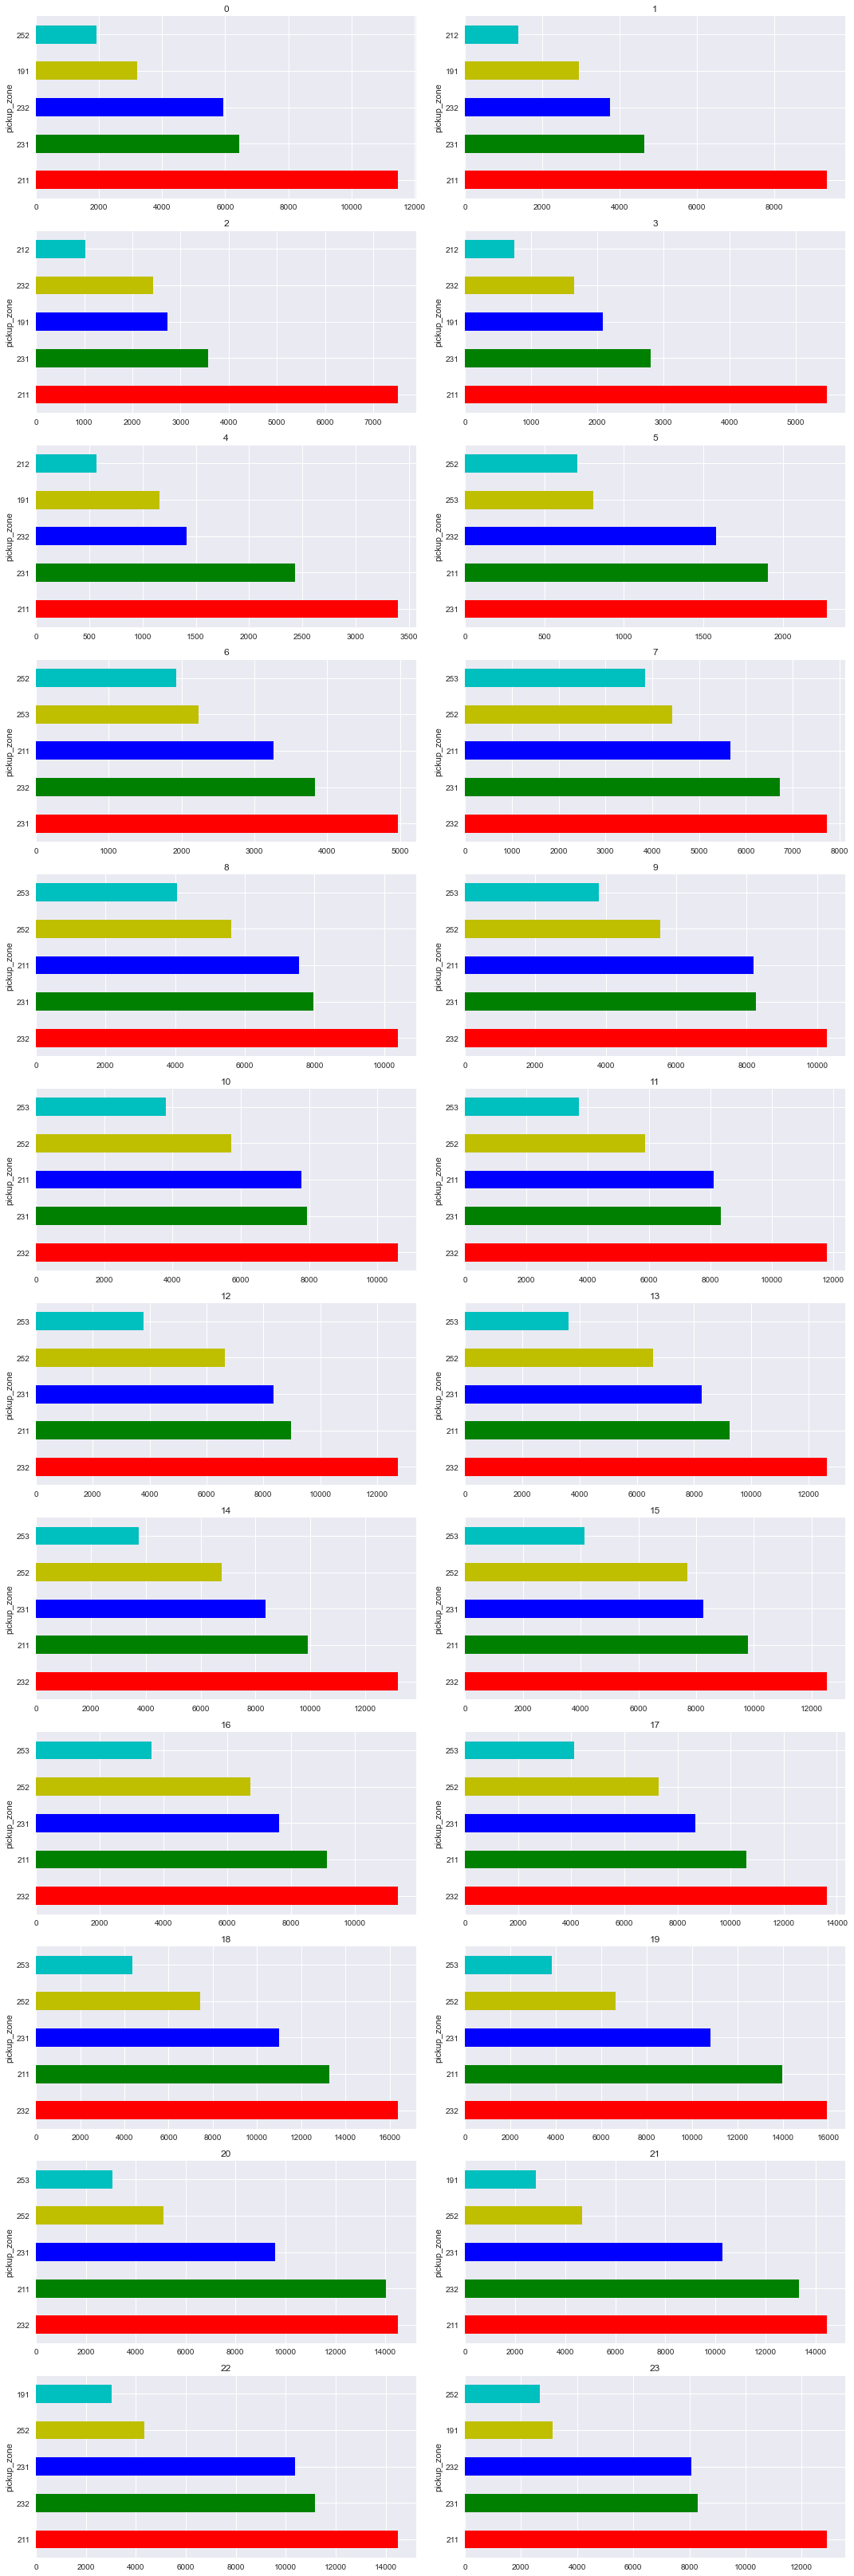

In [37]:
%matplotlib inline
num_col=2
num_row=12

fig, axes = plt.subplots(num_row, num_col, figsize=(15,45))

colors = ['r','g','b','y','c']
for i, (time, pickup_count) in enumerate(hour_zone_group.size().unstack().items()):
    ax = axes[int(i/num_col), i%num_col]
    pickup_count = pickup_count.sort_values(ascending=False)[:5]
    pickup_count.plot(kind='barh',ax=ax, color=colors)
    ax.set_title(time)

plt.tight_layout()

<h2>Groupby analysis 2</h2>
<li>Group data by the weekday and the pickup zone
<li>Draw a figure of 7 plots that show the top 5 pickup zones on each day

In [38]:
weekday_zone_group = df.groupby(['pickup_zone','day_of_week'])

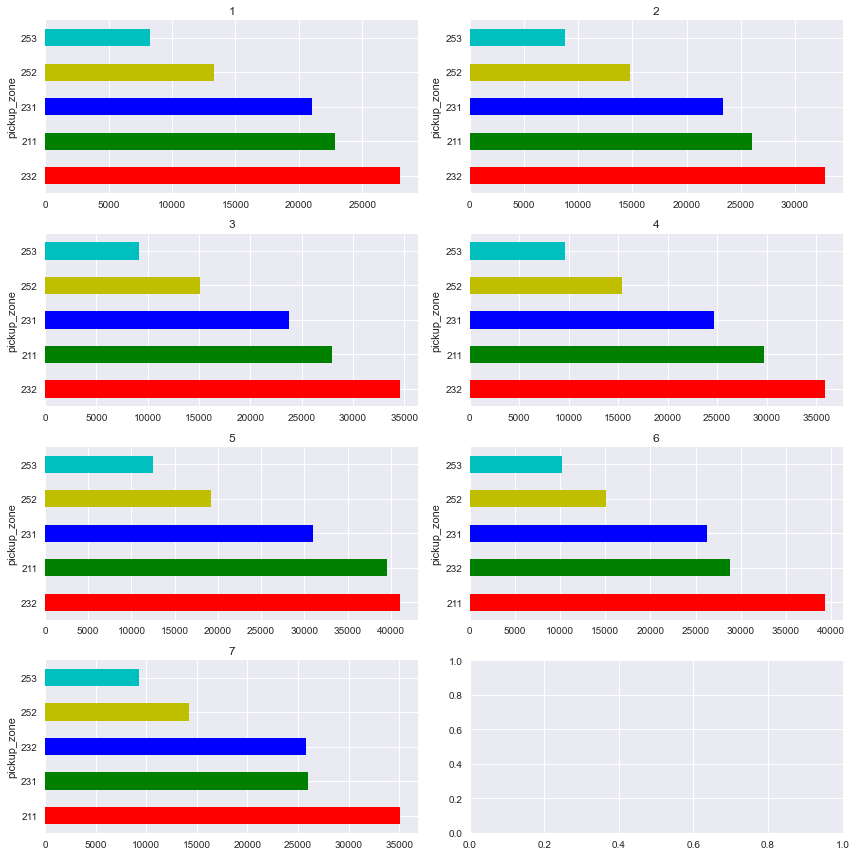

In [39]:
%matplotlib inline
num_col=2
num_row=4

fig, axes = plt.subplots(num_row, num_col, figsize=(12,12))

colors = ['r','g','b','y','c']
for i, (day, pickup_count) in enumerate(weekday_zone_group.size().unstack().items()):
    ax = axes[int(i/num_col), i%num_col]
    pickup_count = pickup_count.sort_values(ascending=False)[:5]
    pickup_count.plot(kind='barh',ax=ax, color=colors)
    ax.set_title(day)

plt.tight_layout()

<h1>Most frequent morning pickups</h1>
<li>Identify the most frequent pickup zone between 8 am and 9 am on a weekday



In [40]:
morning_pickups = df[(df['day_of_week']<=5)&(df['pickup_hour']==8)].groupby('pickup_zone')
sorted_group_sizes = morning_pickups.size().sort_values(ascending=False)
group_max = sorted_group_sizes.index[0]
print(group_max)

232


<h2>Mapping</h2>
<li>Draw a folium map using the polygon geojson object and the counts dataframe (see class example)

In [41]:
#!pip install folium

In [42]:
import folium

In [43]:
import pandas as pd
zone_groups = df.groupby('pickup_zone')
sizes_df = pd.DataFrame(zone_groups.size())

sizes_df.rename(columns={0:"size"},inplace=True)
sizes_df.reset_index(level=0, inplace=True)
sizes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   pickup_zone  207 non-null    object
 1   size         207 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.4+ KB


In [44]:
m = folium.Map(location = [40.7589, -73.9851],zoom_start=12)
zone_table = createZoneTable(20)
geoJSON_zone_data = createGeoJsonObject(zone_table)

m.choropleth(geo_data=geoJSON_zone_data, data=sizes_df,
             columns=['pickup_zone','size'],
             key_on='feature.properties.zone_id',
             fill_color='RdYlGn', fill_opacity=0.7, line_opacity=0.8,
             legend_name='Distribution of Zone Counts')
folium.LayerControl().add_to(m)
             

/opt/anaconda3/lib/python3.7/site-packages/folium/folium.py:413: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [45]:
m